In [146]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [147]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [148]:
y = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)

merge the data

In [149]:
data = pd.concat([train, test], axis=0)

In [150]:
data.shape

(981, 12)

Loan_ID has no predictive power. Removing it

In [151]:
data.drop('Loan_ID', axis=1, inplace=True)

In [152]:
data.shape

(981, 11)

In [153]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


Lets check the frequency of null value in each column.

In [154]:
n_nan = []
for col in data.columns:
    n_nan.append(data[col].isnull().sum())

[24, 3, 25, 0, 55, 0, 0, 27, 20, 79, 0]

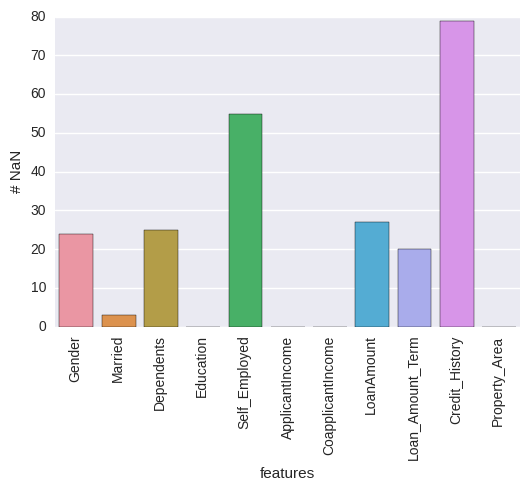

In [155]:
plt.xticks(rotation=90)
g = sns.barplot(x=data.columns, y=n_nan)
g.set(xlabel='features', ylabel='# NaN')
n_nan

It seems, data imputation will play a crucial part in this problem. We will use the following method for feature imputation now.

In [156]:
def impute(data):
	for col in data.columns:		
		data[col] = data[col].fillna('empty') if data[col].dtype == 'object' \
					else data[col].fillna(data[col].mean())
	return data

Lets replace the string of target column

In [157]:
mp = {'Y': 1, 'N': 0}
y = y.map(mp)

In [158]:
data = impute(data)	

In [159]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban


There are some categorical data in the data frame. We will perform One Hot Encoding in get_dummies() method.

In [160]:
data = pd.get_dummies(data)
feature_names = data.columns.values

In [161]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_empty,Married_No,Married_Yes,Married_empty,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_empty,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_empty,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2583,2358.0,120.00000,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.00000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Let's scale the data.

In [162]:
scaler = preprocessing.MinMaxScaler().fit(data)
data2 = scaler.transform(data)

In [163]:
test_id = test.Loan_ID

In [164]:
X = data2[:train.shape[0]]
test = data2[train.shape[0]:]

In [165]:
test

array([[ 0.07061728,  0.        ,  0.14616498, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03797531,  0.03599971,  0.16931983, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.0617284 ,  0.04319965,  0.28798842, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 0.04012346,  0.04783162,  0.16931983, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0617284 ,  0.05743154,  0.21562952, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11358025,  0.        ,  0.12879884, ...,  1.        ,
         0.        ,  0.        ]])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will use gradient boosted classifier as classification algorithm. It will help to get importances of each feature

In [167]:
clf = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=6, random_state=1971)

In [168]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=1971,
              subsample=1.0, verbose=0, warm_start=False)

In [169]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print accuracy

0.756097560976


Ok, We've got 74% accuracy.
Let's see how important each feature is.

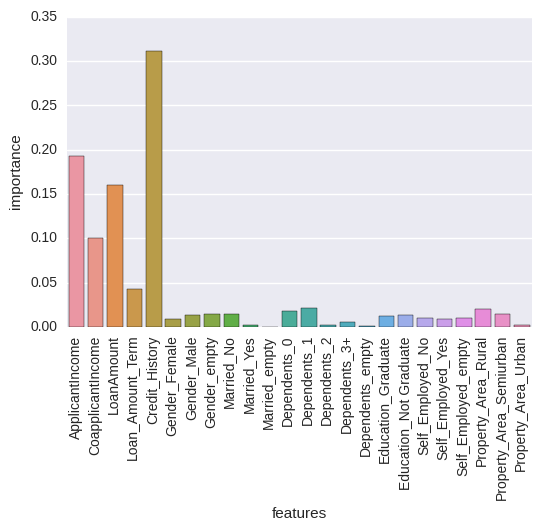

In [170]:
plt.xticks(rotation=90)
g = sns.barplot(x=feature_names, y=clf.feature_importances_)
g.set(xlabel='features', ylabel='importance')

Credit_History is showing the most predictive power. The problem is, it has the most NaN values in it. Straight forward imputing is not helpful in
this scenario. We will build a model to predict those missing Credit_History value. In 2nd stage model, we will predict the Loan_Status. To create the 1st stage model, we will chose only those features which have no missing value in them.

In [171]:
for col in train.columns:
    print col, train[col].isnull().sum()

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0


These are the features having no NaN value.

In [176]:
features1 = ['Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Credit_History']

In [177]:
train[features1].head()

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Credit_History
0,Graduate,5849,0.0,Urban,1.0
1,Graduate,4583,1508.0,Rural,1.0
2,Graduate,3000,0.0,Urban,1.0
3,Not Graduate,2583,2358.0,Urban,1.0
4,Graduate,6000,0.0,Urban,1.0


In [214]:
df = train[features1]

In [238]:
# dropping nan value from the dataframe
dfX = df.dropna()

In [232]:
X = dfX.loc[:, 'Education':'Property_Area']
X = pd.get_dummies(X)
train_x, test_x, train_y, test_y = train_test_split(X, dfX.Credit_History, stratify=dfX.Credit_History)

In [240]:
ch_model = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=6, random_state=1971)
ch_model.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=1971,
              subsample=1.0, verbose=0, warm_start=False)

In [241]:
pred = ch_model.predict(test_x)

In [242]:
acc = accuracy_score(pred, test_y)

In [243]:
print acc*100

80.8510638298


Ok, we've got 80% accuracy on predicting Credit_History. This model will be used for imputing missing Credit_History values.